In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()
X=boston.data
Y=boston.target
#cv = 10
cv = KFold(n_splits=10, shuffle=True, random_state=0)
MSE = []
R2 = []

print('\nlinear regression')
lin = LinearRegression()
scores = cross_val_score(lin, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lin, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\nridge regression')
ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(ridge, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\nlasso regression')
lasso = Lasso(alpha=0.1)
scores = cross_val_score(lasso, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lasso, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\ndecision tree regression')
tree = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(tree, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(tree, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\nrandom forest regression')
forest = RandomForestRegressor(n_estimators=50, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(forest, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(forest, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\nlinear support vector machine')
svm_lin = svm.SVR(epsilon=0.2,kernel='linear',C=1, gamma="auto")
scores = cross_val_score(svm_lin, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(svm_lin, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))
R2.append(scores.mean())

print('\nsupport vector machine rbf')
clf = svm.SVR(epsilon=0.2,kernel='rbf',C=1, gamma="auto")
scores = cross_val_score(clf, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(clf, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))

print('\nknn')
knn = KNeighborsRegressor()
scores = cross_val_score(knn, X, Y, cv=cv)
print("mean R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(knn, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE.append(mean_squared_error(Y,predicted))


linear regression
mean R2: 0.70 (+/- 0.23)
MSE: 23.81

ridge regression
mean R2: 0.70 (+/- 0.24)
MSE: 23.99

lasso regression
mean R2: 0.69 (+/- 0.25)
MSE: 25.06

decision tree regression
mean R2: 0.69 (+/- 0.41)
MSE: 24.99

random forest regression
mean R2: 0.82 (+/- 0.19)
MSE: 14.48

linear support vector machine
mean R2: 0.68 (+/- 0.29)
MSE: 25.84

support vector machine rbf
mean R2: -0.00 (+/- 0.06)
MSE: 83.88

knn
mean R2: 0.51 (+/- 0.23)
MSE: 40.22


In [5]:
from sklearn.feature_selection import RFE
best_features=4
rfe_lin = RFE(lin,best_features).fit(X,Y)
supported_features=rfe_lin.get_support(indices=True)
for i in range(0, 4):
    z=supported_features[i]
    print(i+1,boston.feature_names[z])

1 CHAS
2 NOX
3 RM
4 PTRATIO


In [31]:
MSE_RFE = []
R2_RFE = []
print('feature selection on linear regression')
rfe_lin = RFE(lin,best_features).fit(X,Y)
mask = np.array(rfe_lin.support_)
scores = cross_val_score(lin, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lin, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())

print('feature selection ridge regression')
rfe_ridge = RFE(ridge,best_features).fit(X,Y)
mask = np.array(rfe_ridge.support_)
scores = cross_val_score(ridge, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(ridge, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())

print('feature selection on lasso regression')
rfe_lasso = RFE(lasso,best_features).fit(X,Y)
mask = np.array(rfe_lasso.support_)
scores = cross_val_score(lasso, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lasso, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())

print('feature selection on decision tree')
rfe_tree = RFE(tree,best_features).fit(X,Y)
mask = np.array(rfe_tree.support_)
scores = cross_val_score(tree, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(tree, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())
           
print('feature selection on random forest')
rfe_forest = RFE(forest,best_features).fit(X,Y)
mask = np.array(rfe_forest.support_)
scores = cross_val_score(forest, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(forest, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())                       
                                 
print('feature selection on linear support vector machine')
rfe_svm = RFE(svm_lin,best_features).fit(X,Y)
mask = np.array(rfe_svm.support_)
scores = cross_val_score(svm_lin, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(svm_lin, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE.append(mean_squared_error(Y,predicted))
R2_RFE.append(scores.mean())


feature selection on linear regression
R2: 0.59 (+/- 0.34)
MSE: 33.55
feature selection ridge regression
R2: 0.59 (+/- 0.34)
MSE: 33.59
feature selection on lasso regression
R2: 0.66 (+/- 0.27)
MSE: 27.67
feature selection on decision tree
R2: 0.61 (+/- 0.22)
MSE: 31.96
feature selection on random forest
R2: 0.78 (+/- 0.28)
MSE: 17.38
feature selection on linear support vector machine
R2: 0.58 (+/- 0.35)
MSE: 25.84


In [32]:
cv = 10
MSE_RFE_shuffle = []
R2_RFE_shuffle = []
print('feature selection on linear regression')
rfe_lin = RFE(lin,best_features).fit(X,Y)
mask = np.array(rfe_lin.support_)
scores = cross_val_score(lin, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lin, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())

print('feature selection ridge regression')
rfe_ridge = RFE(ridge,best_features).fit(X,Y)
mask = np.array(rfe_ridge.support_)
scores = cross_val_score(ridge, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(ridge, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())

print('feature selection on lasso regression')
rfe_lasso = RFE(lasso,best_features).fit(X,Y)
mask = np.array(rfe_lasso.support_)
scores = cross_val_score(lasso, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(lasso, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())

print('feature selection on decision tree')
rfe_tree = RFE(tree,best_features).fit(X,Y)
mask = np.array(rfe_tree.support_)
scores = cross_val_score(tree, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
predicted = cross_val_predict(tree, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())
                                 
print('feature selection on random forest')
rfe_forest = RFE(forest,best_features).fit(X,Y)
mask = np.array(rfe_forest.support_)
scores = cross_val_score(forest, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(forest, X[:,mask],Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())
                                 
                                 
print('feature selection on linear support vector machine')
rfe_svm = RFE(svm_lin,best_features).fit(X,Y)
mask = np.array(rfe_svm.support_)
scores = cross_val_score(svm_lin, X[:,mask], Y, cv=cv)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
predicted = cross_val_predict(svm_lin, X,Y, cv=cv)
print("MSE: %0.2f" % mean_squared_error(Y,predicted))
MSE_RFE_shuffle.append(mean_squared_error(Y,predicted))
R2_RFE_shuffle.append(scores.mean())

feature selection on linear regression
R2: 0.16 (+/- 1.59)
MSE: 39.50
feature selection ridge regression
R2: 0.16 (+/- 1.71)
MSE: 39.14
feature selection on lasso regression
R2: 0.21 (+/- 1.15)
MSE: 32.70
feature selection on decision tree
R2: -0.26 (+/- 1.41)
MSE: 37.05
feature selection on random forest
R2: 0.32 (+/- 1.21)
MSE: 24.70
feature selection on linear support vector machine
R2: 0.14 (+/- 2.07)
MSE: 32.39


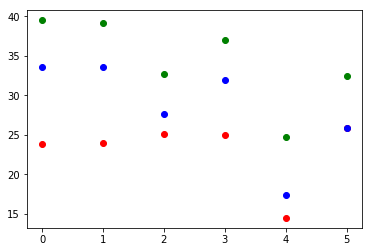

In [34]:
plt.plot(MSE[:6], 'ro') 
plt.plot(MSE_RFE, 'bo')
plt.plot(MSE_RFE_shuffle, 'go') 

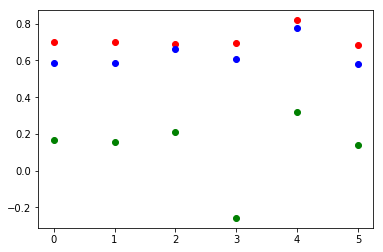

In [33]:
plt.plot(R2, 'ro') # shuffle wo rfe
plt.plot(R2_RFE, 'bo') # shuffle rfe
plt.plot(R2_RFE_shuffle, 'go') # rfe no shuffle